<a href="https://colab.research.google.com/github/StillWork/c9/blob/master/gg_67_%EB%8B%A8%EC%96%B4%EB%B2%A1%ED%84%B0_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding with Keras.Embedding() Layer

- 정수 인덱스를 벡터로 매핑하는 딕셔너리 구조 (인덱스 크기, 벡터 크기)
- 학습 시키는 데이터에 따라 다른 임베딩이 만들어진다.

- IMDB 영화 리뷰 데이터를 사용한 임베딩 예제
  - IMDB: (internet movie database) the world's most popular and authoritative source for movie, TV and celebrity content



In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import os, os.path
import zipfile
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 5000 개의 단어만 사용하고, 각 문장에서는 뒤에서부터 500 개의 단어만 사용하겠음.

In [ ]:
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# y_train[:1000].sum(), y_train[-1000:].sum()   # can assume equally distributed

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
print(y_train[6])
print(x_train[6])

1
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]


In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in x_train[6]])
print('---label---')
print(y_train[6])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'm

In [ ]:
# 각 문장이 몇개의 단어로 구성되어 있는지 확인
[len(x_train[i]) for i in range(10)]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [ ]:
print(max([len(x_train[i]) for i in range(25000)]), min([len(x_train[i]) for i in range(25000)]))
print(max([len(x_test[i]) for i in range(25000)]), min([len(x_test[i]) for i in range(25000)]))

2494 11
2315 7


In [ ]:
x_train[0:2]   # words tokenized and expressed by (word) numbers

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [ ]:
# 마지막 500개의 단어들만 사용한다. -> 500개보다 적으면 똑같은 길이로 만들어 준다.
maxlen = 500
x_train_p=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_p=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train_p.shape, x_test_p.shape)

(25000, 500) (25000, 500)


In [ ]:
y_train.shape, y_test.shape

((25000,), (25000,))

## Embedding layer only

- Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

In [ ]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=maxlen)) # input 각 단어에 대해 32-vector 로 임베딩
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 176,001
Trainable params: 176,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.input_shape, model.output_shape

((None, 500), (None, 1))

In [ ]:
x_train_p.shape, y_train.shape

((25000, 500), (25000,))

In [ ]:
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 7s 13ms/step - loss: 0.5348 - acc: 0.7215 - val_loss: 0.3320 - val_acc: 0.8678
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 0.2593 - acc: 0.8974 - val_loss: 0.2881 - val_acc: 0.8788
Epoch 3/10
313/313 [==============================] - 4s 11ms/step - loss: 0.1830 - acc: 0.9335 - val_loss: 0.2833 - val_acc: 0.8804
Epoch 4/10
313/313 [==============================] - 4s 11ms/step - loss: 0.1301 - acc: 0.9602 - val_loss: 0.2890 - val_acc: 0.8830
Epoch 5/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0886 - acc: 0.9786 - val_loss: 0.3023 - val_acc: 0.8806
Epoch 6/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0578 - acc: 0.9899 - val_loss: 0.3188 - val_acc: 0.8782
Epoch 7/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0370 - acc: 0.9963 - val_loss: 0.3356 - val_acc: 0.8768
Epoch 8/10
313/313 [==============================] - 2s 7ms/step - loss

Text(0.5, 1.0, 'Training(--) and validation loss')

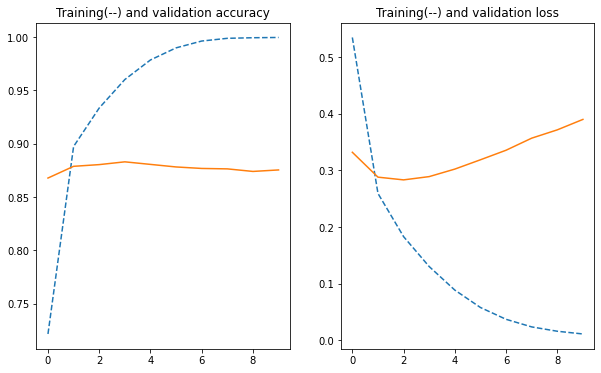

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8709200024604797


- 위의 결과는 500 개의 단어만 고려한 것임.
- 각 단어를 독립적으로 다루었으며, 문장의 구성 정보를 고려하지 않음
- 문장의 구조 정보를 고려하려면 임베딩 층 위에 합성곱이나 순환신경망 층을 추가한다

## CNN

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          20608     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 95, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)          

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 16s 22ms/step - loss: 0.5731 - acc: 0.6427 - val_loss: 0.3215 - val_acc: 0.8600
Epoch 2/10
313/313 [==============================] - 6s 20ms/step - loss: 0.2723 - acc: 0.8924 - val_loss: 0.2803 - val_acc: 0.8810
Epoch 3/10
313/313 [==============================] - 6s 19ms/step - loss: 0.1946 - acc: 0.9273 - val_loss: 0.2806 - val_acc: 0.8834
Epoch 4/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1229 - acc: 0.9576 - val_loss: 0.3623 - val_acc: 0.8750
Epoch 5/10
313/313 [==============================] - 8s 25ms/step - loss: 0.0720 - acc: 0.9773 - val_loss: 0.4635 - val_acc: 0.8770
Epoch 6/10
313/313 [==============================] - 8s 25ms/step - loss: 0.0437 - acc: 0.9858 - val_loss: 0.5333 - val_acc: 0.8784
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 0.0329 - acc: 0.9886 - val_loss: 0.6497 - val_acc: 0.8728
Epoch 8/10
313/313 [==============================] - 6s 20ms/step -

Text(0.5, 1.0, 'Training(--) and validation loss')

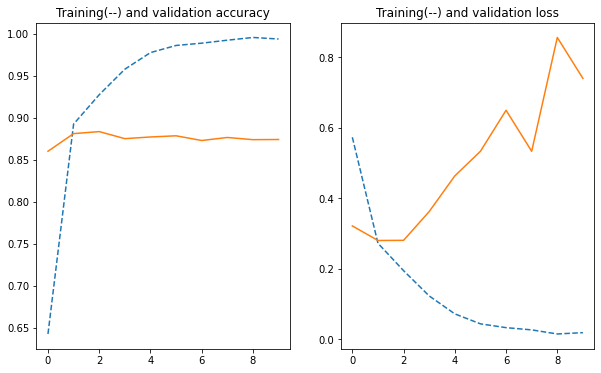

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8569999933242798


In [ ]:
# prediction
model.predict(x_test_p[0:5])

array([[4.8933214e-07],
       [1.0000000e+00],
       [9.8267543e-01],
       [2.8332893e-03],
       [9.9989045e-01]], dtype=float32)

In [ ]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

## GRU RNN 추가

In [ ]:
x_train_p.shape

(25000, 500)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 167,425
Trainable params: 167,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time history = model.fit(x_train_p, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 23s 66ms/step - loss: 0.5495 - acc: 0.6982 - val_loss: 0.3784 - val_acc: 0.8250
Epoch 2/10
313/313 [==============================] - 20s 64ms/step - loss: 0.3031 - acc: 0.8813 - val_loss: 0.3146 - val_acc: 0.8666
Epoch 3/10
313/313 [==============================] - 25s 79ms/step - loss: 0.2391 - acc: 0.9110 - val_loss: 0.3291 - val_acc: 0.8794
Epoch 4/10
313/313 [==============================] - 26s 83ms/step - loss: 0.2023 - acc: 0.9274 - val_loss: 0.3052 - val_acc: 0.8700
Epoch 5/10
313/313 [==============================] - 26s 83ms/step - loss: 0.1656 - acc: 0.9419 - val_loss: 0.3184 - val_acc: 0.8736
Epoch 6/10
313/313 [==============================] - 26s 84ms/step - loss: 0.1387 - acc: 0.9528 - val_loss: 0.3870 - val_acc: 0.8750
Epoch 7/10
313/313 [==============================] - 26s 83ms/step - loss: 0.1060 - acc: 0.9636 - val_loss: 0.4388 - val_acc: 0.8764
Epoch 8/10
313/313 [==============================] - 26s 83ms

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8582000136375427


Text(0.5, 1.0, 'Training(--) and validation loss')

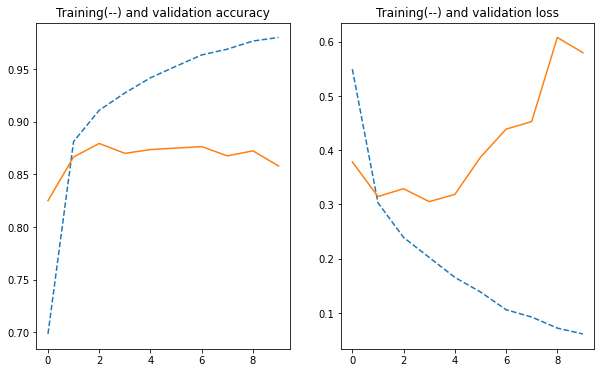

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# prediction
model.predict(x_test_p[0:5])

array([[0.07371671],
       [0.9999988 ],
       [0.02234457],
       [0.9785613 ],
       [0.99999976]], dtype=float32)

In [ ]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

- y_test[2] 는 무슨 문장일까?

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print([id2word.get(i, ' ') for i in x_test[2]])
print(y_test[2])

['the', 'plot', 'near', 'ears', 'recent', 'and', 'and', 'of', 'him', 'flicks', 'frank', 'br', 'by', 'excellent', 'and', 'br', 'of', 'past', 'and', 'near', 'really', 'all', 'and', 'family', 'four', 'and', 'to', 'movie', 'that', 'obvious', 'family', 'brave', 'movie', 'is', 'got', 'say', 'and', 'with', 'up', 'comment', 'this', 'and', 'been', 'of', 'entertaining', 'not', 'be', 'and', 'james', 'in', 'you', 'seen', 'and', 'and', 'portrayed', 'dirty', 'in', 'so', 'washington', 'and', 'this', 'you', 'minutes', 'no', 'all', 'station', 'all', 'after', 'and', 'promising', 'who', 'and', 'and', 'and', 'to', 'and', 'any', 'by', 'speed', 'they', 'is', 'my', 'as', 'screams', 'dirty', 'in', 'of', 'full', 'br', 'pacino', 'dignity', 'need', 'men', 'of', 'and', 'popular', 'really', 'all', 'way', 'this', 'and', 'this', 'and', 'they', 'is', 'my', 'no', 'standard', 'certainly', 'near', 'br', 'an', 'beach', 'with', 'this', 'make', 'and', 'i', 'i', 'of', 'fails', 'and', 'br', 'of', 'finished', 'wear', 'psycho'

## Combine CNN and RNN together

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 496, 64)           10304     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 124, 64)          0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense_5 (Dense)             (None, 1)                 56        
                                                      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
%time history = model.fit(x_train_p, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 14s 36ms/step - loss: 0.4652 - acc: 0.7555 - val_loss: 0.3071 - val_acc: 0.8760
Epoch 2/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2594 - acc: 0.8974 - val_loss: 0.2761 - val_acc: 0.8858
Epoch 3/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2156 - acc: 0.9172 - val_loss: 0.2619 - val_acc: 0.8934
Epoch 4/10
313/313 [==============================] - 12s 38ms/step - loss: 0.1924 - acc: 0.9284 - val_loss: 0.2812 - val_acc: 0.8818
Epoch 5/10
313/313 [==============================] - 11s 34ms/step - loss: 0.1672 - acc: 0.9377 - val_loss: 0.2600 - val_acc: 0.8932
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.1501 - acc: 0.9446 - val_loss: 0.2898 - val_acc: 0.8802
Epoch 7/10
313/313 [==============================] - 10s 32ms/step - loss: 0.1352 - acc: 0.9510 - val_loss: 0.2968 - val_acc: 0.8872
Epoch 8/10
313/313 [==============================] - 10s 32ms

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8635600209236145


Text(0.5, 1.0, 'Training(--) and validation loss')

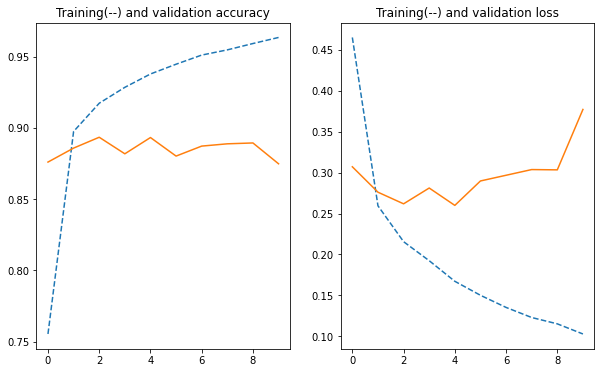

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

# Exercise (연습)
- By default, if a GPU is available, the embedding matrix will be placed on the GPU. This achieves the best performance.
- in order to use CPU (too big to fit on GPU), you should use CPU
  - with tf.device('cpu:0'):
  -embedding_layer = Embedding(...)
  - embedding_layer.build()

In [ ]:
import tensorflow as tf
# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],
      ['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다. (훈련 없이 모양만 보기 위함)
embedding_layer = Embedding(7, 2, input_length=5)
result = embedding_layer(tf.constant([0, 1, 2, 3, 4, 5, 6]))
print(result.numpy())

# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다. 아래와 같은 형태가 됨.


[[ 0.03196346  0.0476577 ]
 [ 0.03963225 -0.015067  ]
 [ 0.02069629 -0.03718712]
 [-0.03675215  0.04607988]
 [ 0.0419892   0.04081521]
 [-0.02809124  0.02720909]
 [ 0.04206193  0.00596648]]


In [ ]:
model = Sequential()
model.add(Embedding(7, 2))
model.add(Flatten())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 2)           14        
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(7, 2, input_length=5)) # need input_length to be connected to Flatten then Dense layers
model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 5, 2)              14        
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
